# Scores & Décisions

In [1]:
########## PARAMETRAGE #########
CT_SAMPLE = True
CT_BILAN = False
CT_SAVE = False
CT_CJ = 5
########## PARAMETRAGE #########

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from time import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.metrics import roc_curve, auc, mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV

from score_functions import *

In [2]:
# Quelques options d'affichage
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
plt.style.use('default')

## 1. Lecture des tables

In [3]:
df = loadTableCJ(CT_CJ, bBilan=CT_BILAN)

*** loadTableCJ ***
reading //GESTIONSAGE1/Fichiers/Services S&D/S&D/6_ProjetsInterne/Morgan/export/scores_predictions_PROD_CJ5.csv ...
*** complete_and_clean ***


KeyboardInterrupt: 

In [ ]:
if CT_SAMPLE:
    df = df.sample(20000)

## 2. Nettoyage

### Les absorptions

### Les déjà inactifs

### Autre nettoyage

## Target

In [65]:
import itertools
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
class_names = ['False', 'True']

In [55]:
# Etat des lieux
from sklearn.metrics import confusion_matrix

# Compute confusion matrix - TOUTES LES DONNEES
print('\t\tAnalyse de toutes les données')
cnf_matrix = confusion_matrix(df['target'], (df.indiScoreMoins1>6))
# Plot normalized & non-normalized confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

,siren,ii_ACTIVNAT,ii_ORIGINE,ii_EXPLET,ii_DAPET,ii_CJ,ii_NBETAB,ii_APE_ENT,ii_CAPITAL,ii_EFF_ENT,ii_TEFF_ENT,ii_ADR_DEP,ii_TCA,jl_PARTICIPATION,jl_ACTIONNARIAT,jd_NBPM,jd_NBPP,sb_EnBourse,jg_NBDE,jg_NBDF,bm_NBMARQUES,procol,indiScore,encours,procolMoins1,indiScoreMoins1,encoursMoins1,procolMoins2,indiScoreMoins2,encoursMoins2,procolMoins3,indiScoreMoins3,encoursMoins3,procolMoins4,indiScoreMoins4,encoursMoins4,target
3,300016292,0,1,NaN,2008,3220,0,5110Z,0,20,12,99,NaN,0,0,0,0,NaN,0,0,0,NaN,14,130000,NaN,14.0,130000.0,NaN,14.0,130000.0,NaN,14.0,130000.0,NaN,14.0,130000.0,True
16,301766093,0,1,NaN,2008,3120,0,2561Z,0,50,21,99,4.0,0,0,0,0,NaN,0,0,1,NaN,10,6750,NaN,10.0,6750.0,NaN,10.0,6750.0,NaN,10.0,6750.0,NaN,10.0,6750.0,True
21,302411012,0,1,NaN,2008,3210,0,9900Z,0,20,12,75,NaN,0,0,0,0,NaN,0,0,0,NaN,14,0,NaN,14.0,0.0,NaN,14.0,0.0,NaN,14.0,0.0,NaN,14.0,0.0,True
23,302421045,0,1,NaN,2008,3120,0,5010Z,125000,200,32,99,NaN,0,0,0,0,NaN,0,0,0,NaN,14,8750,NaN,14.0,8750.0,NaN,14.0,8750.0,NaN,14.0,8750.0,NaN,14.0,8750.0,True
24,302493747,0,1,NaN,2008,3210,0,9900Z,0,6,03,75,NaN,0,0,0,0,NaN,0,0,0,NaN,14,0,NaN,14.0,0.0,NaN,14.0,0.0,NaN,14.0,0.0,NaN,14.0,7500.0,True
30,302717327,0,1,NaN,2016,3290,0,7219Z,0,3,02,38,NaN,0,0,0,0,NaN,0,0,0,NaN,14,8750,NaN,14.0,8750.0,NaN,14.0,8750.0,NaN,14.0,8750.0,NaN,14.0,8750.0,True
31,302969605,0,NaN,NaN,2008,3205,0,9900Z,0,3,02,75,NaN,0,0,0,0,NaN,0,0,0,NaN,14,0,NaN,14.0,0.0,NaN,14.0,0.0,NaN,14.0,0.0,NaN,NaN,NaN,True
35,302979018,0,9,NaN,2008,3210,0,9900Z,0,20,12,75,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,NaN,14.0,0.0,NaN,14.0,0.0,NaN,14.0,0.0,NaN,14.0,0.0,True
36,302980792,0,1,NaN,2008,3220,0,6910Z,0,20,12,99,NaN,0,0,0,0,NaN,0,0,0,NaN,12,6750,NaN,12.0,6750.0,NaN,12.0,6750.0,NaN,12.0,6750.0,NaN,12.0,0.0,True
37,302983713,0,1,X,2008,3220,2,7911Z,0,0,00,99,NaN,0,0,0,0,NaN,0,0,0,NaN,12,0,NaN,12.0,0.0,NaN,12.0,0.0,NaN,12.0,0.0,NaN,NaN,NaN,True


In [56]:
df.describe()

,siren,ii_DAPET,ii_CJ,ii_NBETAB,ii_CAPITAL,ii_EFF_ENT,ii_TCA,jl_PARTICIPATION,jl_ACTIONNARIAT,jd_NBPM,jd_NBPP,sb_EnBourse,jg_NBDE,jg_NBDF,bm_NBMARQUES,indiScore,encours,indiScoreMoins1,encoursMoins1,indiScoreMoins2,encoursMoins2,indiScoreMoins3,encoursMoins3,indiScoreMoins4,encoursMoins4
count,1.130700e+04,11307.000000,11307.000000,11307.000000,1.130700e+04,11307.000000,47.000000,11307.000000,11307.000000,11307.000000,11307.0,3.0,11307.000000,11307.000000,11307.000000,11307.000000,11307.000000,11307.000000,11307.000000,3942.000000,3942.000000,2360.000000,2360.000000,1978.000000,1978.000000
mean,6.845449e+08,2012.740780,3189.365437,0.168568,4.633217e+07,3.465464,5.702128,0.019899,0.287167,0.027240,0.0,1.0,0.054303,0.068453,0.022022,8.328646,10301.892987,9.222517,10980.809675,10.116438,23063.735413,10.762712,30407.844492,10.511628,29849.385238
std,1.787836e+08,3.876627,49.743613,0.764893,3.814381e+09,32.799229,1.614000,0.145856,6.922498,0.501158,0.0,0.0,1.514674,1.320651,0.427011,3.294909,43709.413604,2.607772,44603.441705,3.008301,64523.403884,3.091725,72316.214278,3.228151,73205.957549
min,3.000163e+08,1949.000000,3110.000000,0.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.939570e+08,2008.000000,3120.000000,0.000000,0.000000e+00,0.000000,4.500000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,6.000000,0.000000,8.000000,0.000000,8.000000,0.000000,10.000000,0.000000,8.000000,0.000000
50%,8.175524e+08,2015.000000,3220.000000,0.000000,0.000000e+00,0.000000,6.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,8.000000,0.000000,8.000000,0.000000,10.000000,0.000000,10.000000,902.500000,10.000000,0.000000
75%,8.221242e+08,2016.000000,3220.000000,0.000000,0.000000e+00,0.000000,7.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,10.000000,0.000000,10.000000,0.000000,12.000000,6750.000000,12.250000,8250.000000,12.000000,8000.000000
max,8.287112e+08,2018.000000,3290.000000,30.000000,4.016400e+11,2100.000000,9.000000,2.000000,541.000000,35.000000,0.0,1.0,92.000000,85.000000,23.000000,19.000000,500000.000000,19.000000,500000.000000,19.000000,500000.000000,19.000000,500000.000000,19.000000,500000.000000


In [57]:
df.select_dtypes(exclude=[np.number]).describe()

,ii_ACTIVNAT,ii_ORIGINE,ii_EXPLET,ii_APE_ENT,ii_TEFF_ENT,ii_ADR_DEP,procol,procolMoins1,procolMoins2,procolMoins3,procolMoins4,target
count,11307,11126,2283,11307,11307,11283,368,230,191,144,123,11307
unique,16,8,3,542,14,57,4,6,5,4,4,2
top,0,1,X,4791B,00,99,R,R,R,R,R,True
freq,9016,8827,2133,679,6909,10793,318,213,178,134,112,10939


## Valeurs manquantes

## Préparation des data

In [97]:
dropcols = ['procol', 'msoScore', 'indiScore', 'encours', 'siren', 'ii_DAPET']
x_train, x_test, y_train, y_test, y_pred_actuelle = prepareData(df, CT_CJ, dropcols, p_strat=df['target'], bSave=CT_SAVE)

reading C:/Users/Mscao/OneDrive - INTESCIA/export/scores_predictions_PROD_CJ8.csv ...
shape  (20676, 87)
20676 SIREN


C:\Users\Mscao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (1,5,7,9,11,13,15,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(20676, 46)
20676 SIREN
-73 absorptions
0 déjà inactifs
Reste 4968 SIREN
4950 SIREN actifs
	 4947 TP (True Positifs)
	 3 FP (False Negatifs)
18 SIREN en défaut
	 14 FN (False Positifs)
	 4 TN (True Negatifs)
Numérique :
	 ['ii_ACTIVNAT', 'ii_MODET', 'ii_DAPET', 'ii_CJ', 'ii_NBETAB', 'ii_CAPITAL', 'ii_EFF_ENT', 'ii_TCA', 'ii_TCAEXP', 'jl_PARTICIPATION', 'jl_ACTIONNARIAT', 'jd_NBPM', 'jd_NBPP', 'sb_EnBourse', 'jg_NBDE', 'jg_NBDF', 'bm_NBMARQUES', 'encours', 'indiScoreMoins1', 'encoursMoins1', 'indiScoreMoins2', 'encoursMoins2', 'indiScoreMoins3', 'encoursMoins3', 'indiScoreMoins4', 'encoursMoins4']
Catégories :
	 ['ii_ORIGINE', 'ii_EXPLET', 'ii_APE_ENT', 'ii_TEFF_ENT', 'ii_ADR_DEP', 'procolMoins1', 'procolMoins2', 'procolMoins3', 'procolMoins4']
Après binarisation les catégories prennent 210 dimensions.
C:/Users/Mscao/OneDrive - INTESCIA/export/save/CJ5_model_columnsScale(4968, 236).pkl saved
C:/Users/Mscao/OneDrive - INTESCIA/export/save/CJ5_model_columnsCateg(4968, 236).pkl saved
C:/Us

Analyse de toutes les données
	AUC = 0.631
	Spécificité = 0.481
	Precision = 0.960
	Recall = 0.780
Confusion matrix, without normalization
[[  562   606]
 [ 4139 14693]]
Normalized confusion matrix
[[0.48 0.52]
 [0.22 0.78]]


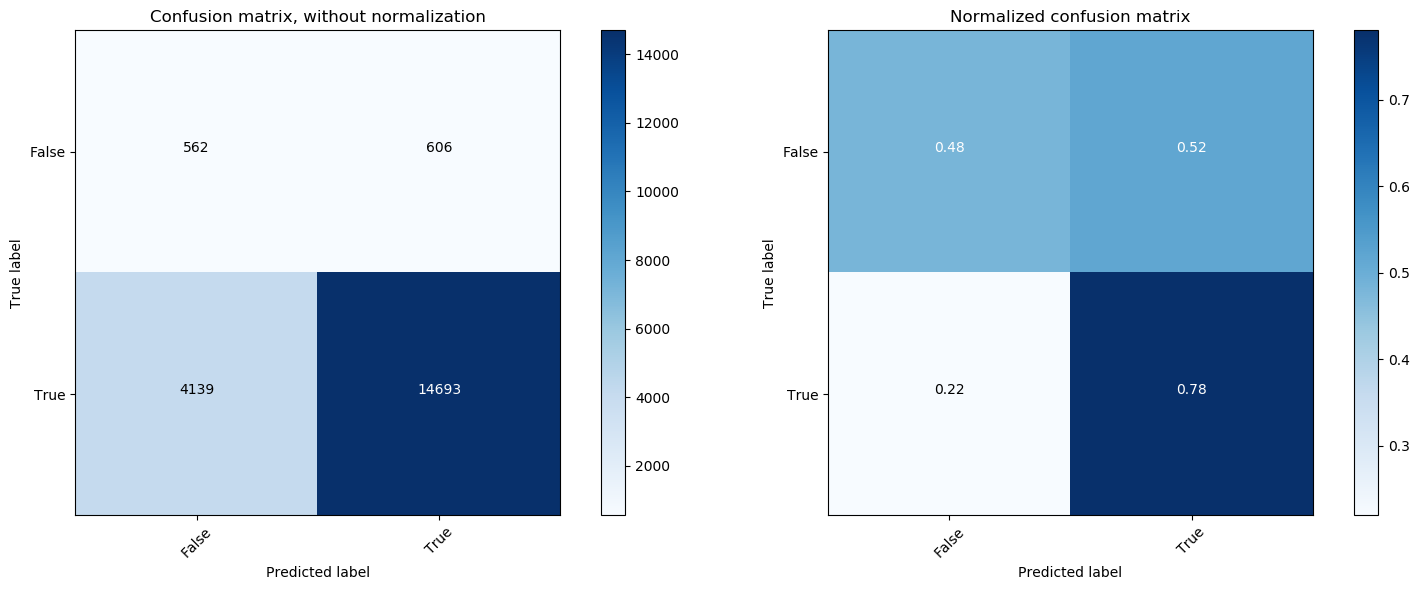

In [116]:
print('Analyse de toutes les données')
# Compute confusion matrix - TOUTE LES DONNEES
cnf_matrix = confusion_matrix(df['target'], (df.indiScoreMoins1>6))

false_positive_rate, true_positive_rate, thresholds = roc_curve(df['target'], (df.indiScoreMoins1>6))
tn, fp, fn, tp = cnf_matrix.ravel()
# Aire sous la courbe
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("\tAUC = %.3f" % roc_auc)
print ("\tSpécificité = %.3f" % (tn/(tn+fp)))
print ("\tPrecision = %.3f" % precision_score(df['target'], (df.indiScoreMoins1>6)))
print ("\tRecall = %.3f" % recall_score(df['target'], (df.indiScoreMoins1>6)))

# Plot normalized & non-normalized confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

Confusion matrix, without normalization
[[  17   57]
 [ 270 1918]]
Normalized confusion matrix
[[0.23 0.77]
 [0.12 0.88]]


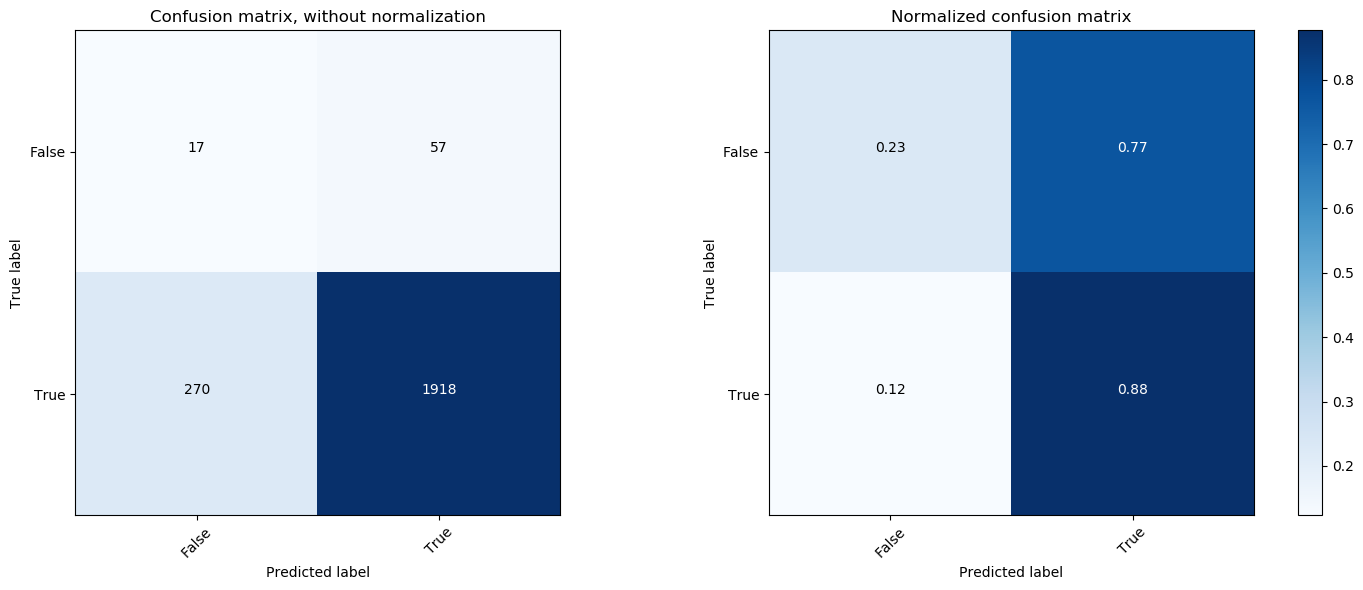

In [64]:
print('Analyse du jeu de test')
# Compute confusion matrix - JEU DE TEST
cnf_matrix = confusion_matrix(y_test, y_pred_actuelle)

# Plot normalized & non-normalized confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

## Réduction dimensionnelle

In [66]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

#Réduc dimensionnelle
print(x_test.shape)
print(x_train.shape)


(2262, 674)
(9045, 674)


In [68]:
reducPCA, X_red = testPCA(pd.merge(x_test, x_train))
X_red.shape

reducTSVD, X_red = testTSVD(pd.merge(x_test, x_train))
X_red.shape

x_train = reducPCA.transform(x_train)
x_test = reducPCA.transform(x_test)

Original number of features: 674
Reduced number of features: 152


(40432, 152)

## Recherche d'un modèle

In [12]:
from sklearn import dummy
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

fpr = []
tpr = []
labels = []
rocs = []

def RunModel(model, label, params={}):
    print (label)
    t0 = time()
    gs = GridSearchCV(model, param_grid=params, cv=5)
    gs.fit(x_train, y_train)

    # On récupère la prédiction de la valeur positive
    y_pred = gs.predict_proba(x_test)[:,1]
    y_pred_Bool = gs.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, gs.predict(x_test))
    tn, fp, fn, tp = cnf_matrix.ravel()

    # Aire sous la courbe
    roc_auc = auc(false_positive_rate, true_positive_rate)

    print ("\tAUC = %.3f" % roc_auc)
    print ("\tSpécificité = %.3f" % (tn/(tn+fp)))
    print ("\tPrecision = %.3f" % precision_score(y_test, y_pred_Bool))
    print ("\tRecall = %.3f" % recall_score(y_test, y_pred_Bool))
    print("\tDone in %is" % (time() - t0))
    
    fpr.append(false_positive_rate)
    tpr.append(true_positive_rate)
    rocs.append(roc_auc)
    labels.append(label)

    # Plot normalized & non-normalized confusion matrix
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.subplot(1, 2, 2)
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()

    #TODO : save model & infos 
    if not CT_SAMPLE:
        save_sklearn_obj(gs.best_estimator_, CT_CJ+'_'+label+str(df.shape)+str(int((np.round(roc_auc,3)*1000))))
    
    return gs.best_estimator_

Méthode naive
	AUC = 0.500
	Spécificité = 0.000
	Precision = 0.967
	Recall = 1.000
	Done in 0s
Confusion matrix, without normalization
[[   0   74]
 [   0 2188]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


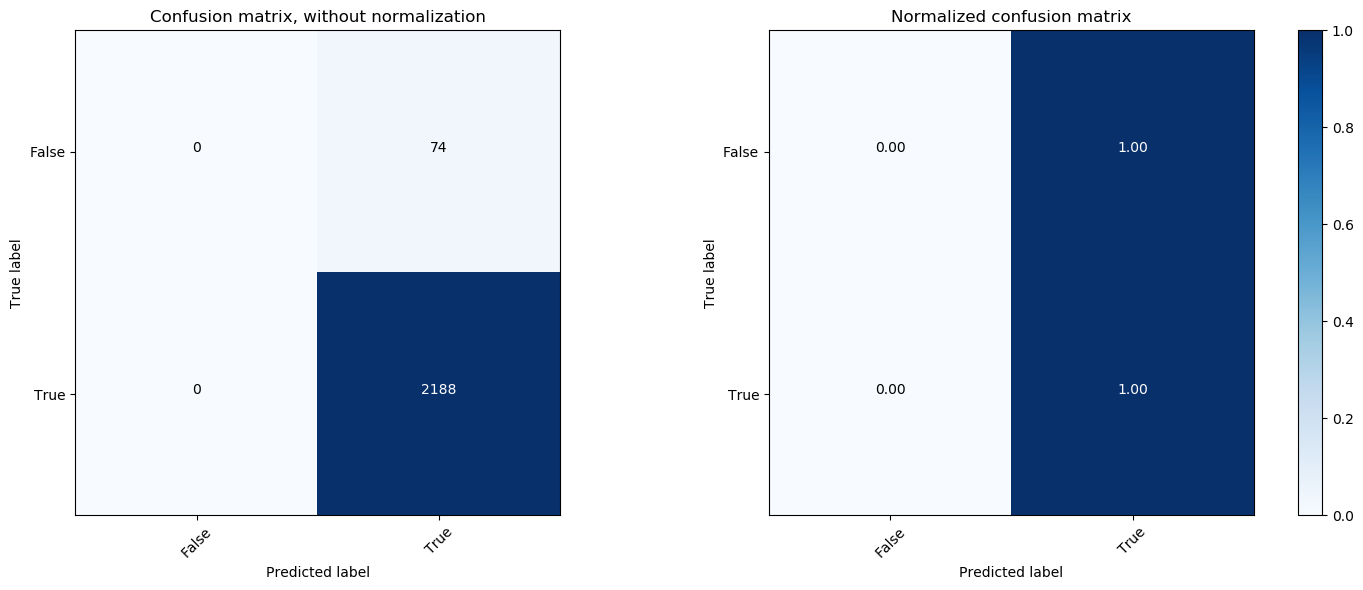

C:/Users/Mscao/OneDrive - INTESCIA/export/save/CJ3_Méthode naive(11307, 37)500.pkl saved
ExtraTreesClassifier
	AUC = 0.674
	Spécificité = 0.041
	Precision = 0.968
	Recall = 0.993
	Done in 1s
Confusion matrix, without normalization
[[   3   71]
 [  16 2172]]
Normalized confusion matrix
[[0.04 0.96]
 [0.01 0.99]]


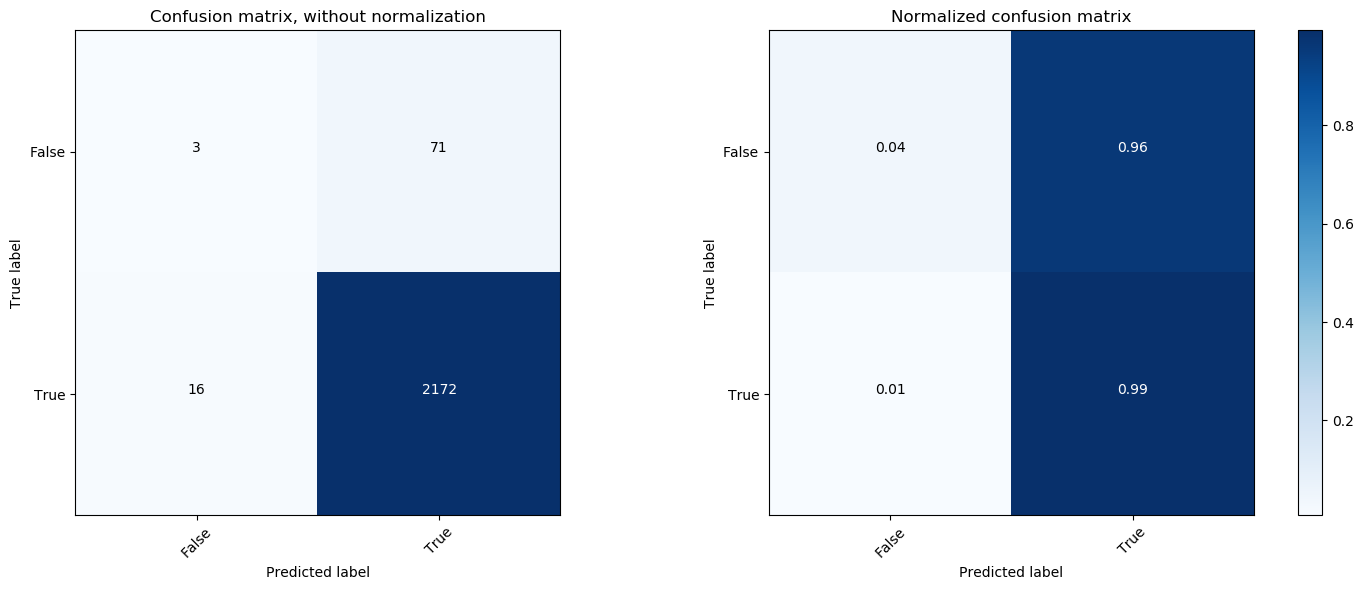

C:/Users/Mscao/OneDrive - INTESCIA/export/save/CJ3_ExtraTreesClassifier(11307, 37)674.pkl saved
LogisticRegression
	AUC = 0.826
	Spécificité = 0.000
	Precision = 0.967
	Recall = 0.999
	Done in 2s
Confusion matrix, without normalization
[[   0   74]
 [   2 2186]]
Normalized confusion matrix
[[0.00e+00 1.00e+00]
 [9.14e-04 9.99e-01]]


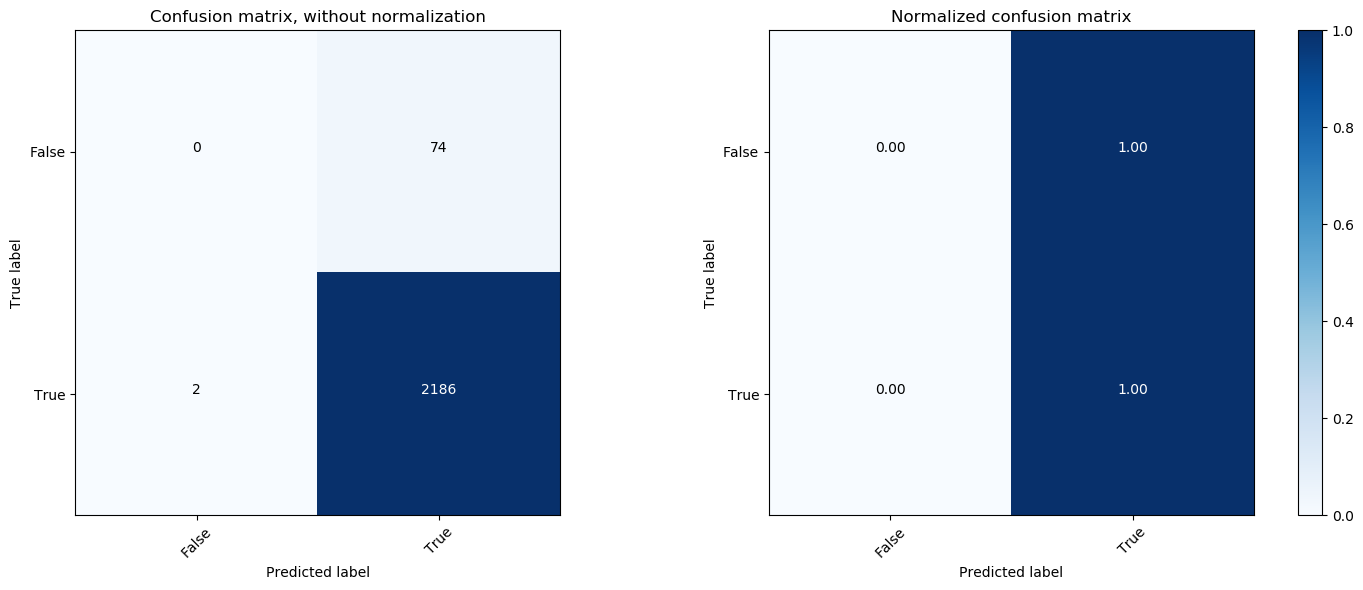

C:/Users/Mscao/OneDrive - INTESCIA/export/save/CJ3_LogisticRegression(11307, 37)826.pkl saved


In [79]:
# Méthode naive par la classe la plus fréquente pour comparer
RunModel(dummy.DummyClassifier(strategy='most_frequent'), 'Méthode naive')
#RunModel(GaussianNB(), 'GaussianNB') Pas performant
etModel = RunModel(ExtraTreesClassifier(), 'Extrlassifier')
lrModel = RunModel(LogisticRegression(), 'LogisticRegraTreesCession')

GradientBoostingClassifier
	AUC = 0.873
	Spécificité = 0.014
	Precision = 0.968
	Recall = 0.998
	Done in 43s
Confusion matrix, without normalization
[[   1   73]
 [   5 2183]]
Normalized confusion matrix
[[0.01 0.99]
 [0.   1.  ]]


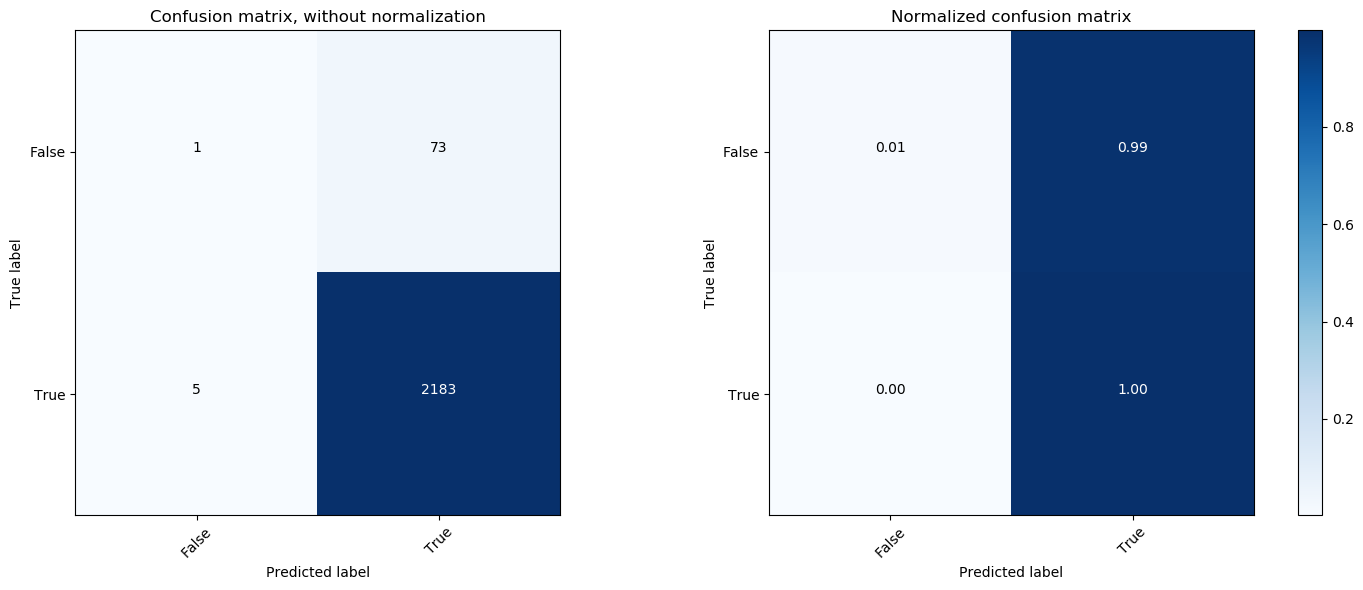

C:/Users/Mscao/OneDrive - INTESCIA/export/save/CJ3_GradientBoostingClassifier(11307, 37)873.pkl saved
RandomForestClassifier
	AUC = 0.824
	Spécificité = 0.027
	Precision = 0.968
	Recall = 0.998
	Done in 35s
Confusion matrix, without normalization
[[   2   72]
 [   4 2184]]
Normalized confusion matrix
[[0.03 0.97]
 [0.   1.  ]]


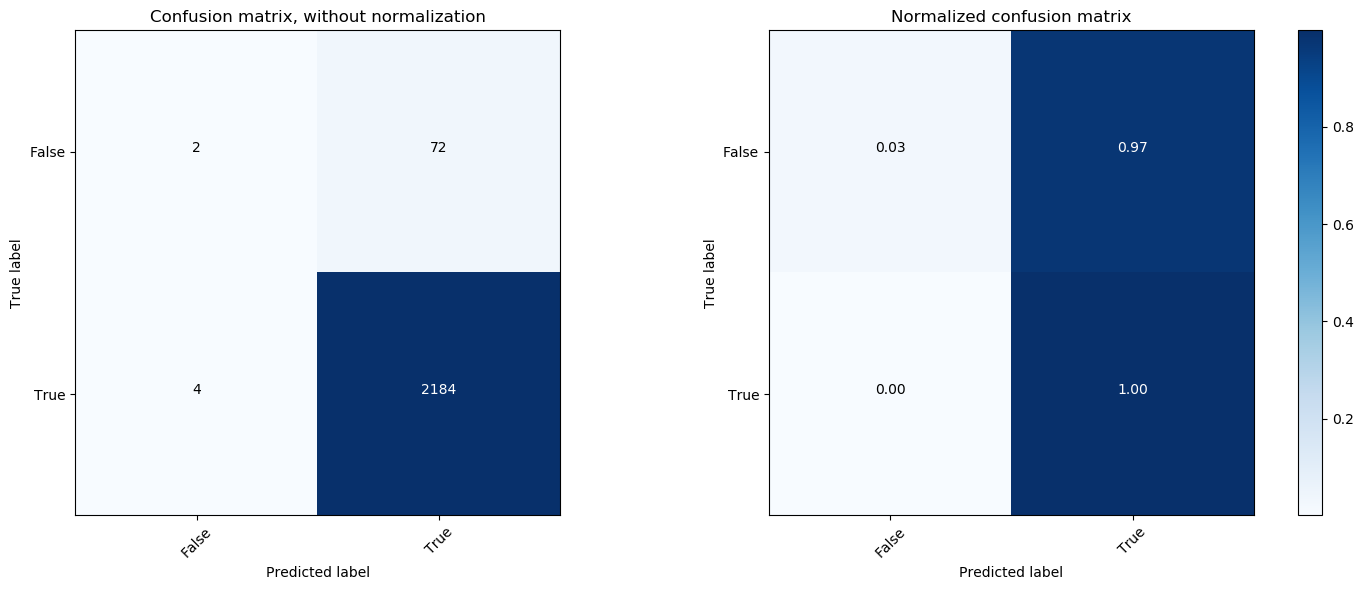

C:/Users/Mscao/OneDrive - INTESCIA/export/save/CJ3_RandomForestClassifier(11307, 37)824.pkl saved


In [80]:
#RunModel(KNeighborsClassifier(), 'KNeighborsClassifier') Trop long
gbModel = RunModel(GradientBoostingClassifier(), 'GradientBoostingClassifier')
bestModel = RunModel(RandomForestClassifier(n_estimators=100), 'RandomForestClassifier')

In [14]:
def addReel(y_test, y_pred_actuelle):
    #scaler=load_sklearn_obj('scaler')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_actuelle)

    # Aire sous la courbe
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("Indiscore actuel")
    print ("\tAUC = %.3f" % roc_auc)

    fpr.append(false_positive_rate)
    tpr.append(true_positive_rate)
    rocs.append(roc_auc)
    labels.append('réel')


In [15]:
# Courbes ROC
def displayROC():
    plt.figure(figsize=(16,10))
    plt.title('Receiver Operating Characteristic')
    colors = ['pink', 'b', 'g', 'r', 'y', 'c', 'm', 'gray', 'aqua', 'lime', 'k']
    for i in range(len(fpr)):
        plt.plot(fpr[i], tpr[i], color=colors[i], label = 'AUC %s = %0.3f' % (labels[i], rocs[i]))
    plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.xlabel('1 - spécificité', fontsize=14)
    plt.ylabel('Sensibilité', fontsize=14)
    plt.show()

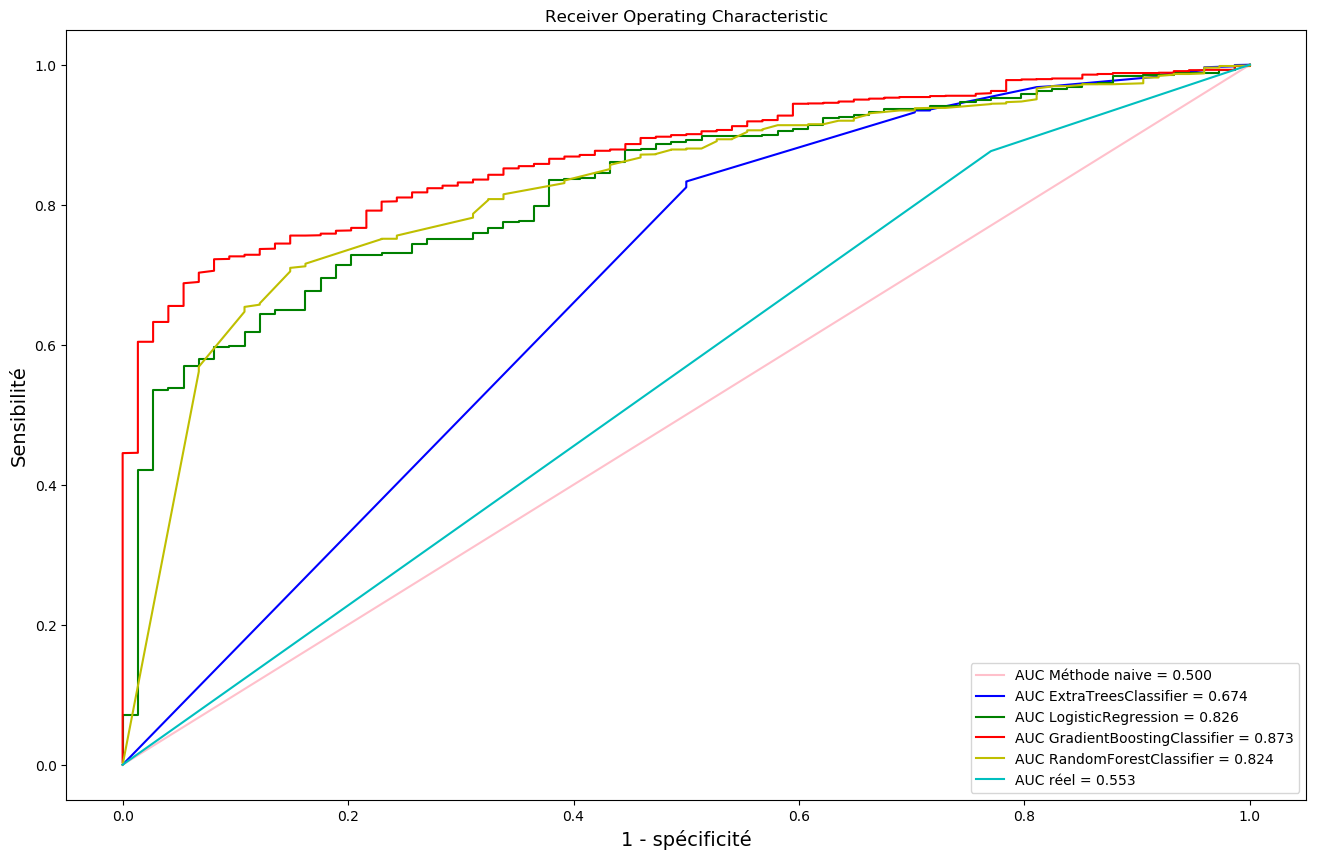

In [82]:
addReel(y_test, y_pred_actuelle)
displayROC()


In [ ]:
predictors = [x for x in x_train.columns]
feat_imp = pd.Series(bestModel.feature_importances_, predictors).sort_values(ascending=False)

print(feat_imp[:15])

plt.figure(figsize=(16, 10))
feat_imp[:15].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

## PCA 

In [ ]:
displayPCA(x_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, HuberRegressor, Lars, SGDRegressor
from sklearn.dummy import DummyRegressor

modeles = [
    # Dummy comme base de référence
    (DummyRegressor(strategy='mean'), {}),
    # Régression simple pour commencer
    (LinearRegression(), {}),
    # LARS (Pas forcément adapté car meilleur avec plus de features que de points et sensible aux outliers mais pour voir)
#    (Lars(), {}),
    # Ridge (régulation de Tykhonov, norme l2)
#    (Ridge(), {'alpha':[0.01, 0.1, 1]}),
    # Coefficient de régularisation de norme l1
#    (Lasso(), {'alpha':[0.01, 0.1, 1]}),
    # Combinaison de Ridge et LASSO
#    (ElasticNet(), {'alpha':[0.01, 0.1, 1], 'l1_ratio':[0.1, 0.5, 0.9]}),
    # Descente de gradient stochastique, optimisation de l'approximation à chaque itération, adapdé aux grandes dimensions
    # On va pouvoir traiter les outliers de différentes façons
#    (SGDRegressor(), {'loss':['squared_loss', 'huber', 'epsilon_insensitive'], 'max_iter':[1000]}),
#        (SGDRegressor(loss='epsilon_insensitive'), {'penalty':['l1', 'l2', 'elasticnet'], 'max_iter':[1000]}),
#        (SGDRegressor(loss='epsilon_insensitive'), {'l1_ratio':[0.1, 0.15, 0.2], 'max_iter':[1000]}),
#        (SGDRegressor(loss='epsilon_insensitive'), {'alpha':10.0**-np.arange(4,7), 'max_iter':[1000]}),
    # Bonne gestion des outliers
#    (HuberRegressor(), {'alpha':[0.0001, 0.001, 0.01, 1], 'epsilon':[1, 1.35]}),
]

for mod, params in modeles:
    t0 = time()
    # On entraine le modèle sur différents paramètres et en validation croisée
    gs = GridSearchCV(mod, params, scoring = 'neg_mean_absolute_error', cv=5, refit=True)
    gs.fit(x_train, y_train)
    print("MAE = %.3f" % mean_absolute_error(y_test, gs.best_estimator_.predict(x_test)))
    print("\tbest_estimator_=", gs.best_estimator_)
    print("\tDone in %is" % (time() - t0))


## Conclusion

In [18]:
CT_SAMPLE = True
CT_CJ = 5

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from time import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.metrics import roc_curve, auc, mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV

from score_functions import *

In [19]:
dfraw = loadTableCJ(CT_CJ)

*** loadTableCJ ***
reading C:/Users/Mscao/OneDrive - INTESCIA/Export/scores_predictions_PROD_CJ5.csv ...
*** complete_and_clean ***
Lecture des statistiques
2453107 SIREN
-1258498 sans indiScore il y a 12 mois, ou à 0
-50763 absorptions
Reste 1143846 SIREN
*** fillBlanks ***
	Nan de ii_ORIGINE remplacés par 1
	Nan de ii_EXPLET remplacés par O
	Nan de indiScoreMoins2 remplacés par 10.300353459032637
	Nan de indiScoreMoins3 remplacés par 10.277438226944739
	Nan de indiScoreMoins4 remplacés par 10.553874382237959
	Nan de ii_ORIGINE remplacés par 0
	Nan de ii_EXPLET remplacés par 0
	Nan de sb_EnBourse remplacés par 0
	Nan de encoursMoins1 remplacés par 0
	Nan de encoursMoins2 remplacés par 0
	Nan de encoursMoins3 remplacés par 0
	Nan de encoursMoins4 remplacés par 0
1075560 SIREN actifs il y a 12 mois
	 837555 TP (True Positifs)
	 238005 FN (False Negatifs)
68286 SIREN en défaut
	 35568 FP (False Positifs)
	 32718 TN (True Negatifs)


In [20]:
CT_REDUC = False
df = dfraw.copy()
if CT_SAMPLE:
    df = dfraw.sample(50000)

In [27]:
dropcols = ['procol', 'msoScore', 'siren', 'indiScore', 'encours', 'indiScoreMoins1', 'encoursMoins1', 
            'indiScoreMoins2', 'encoursMoins2', 'indiScoreMoins3', 'encoursMoins3', 'indiScoreMoins4', 'encoursMoins4']
x_train, x_test, y_train, y_test, y_pred_actuelle, x_final = prepareData(df, CT_CJ, dropcols, p_strat=df['target'], bSave=CT_SAVE)

Numérique :
	 ['ii_NBETAB', 'ii_CAPITAL', 'ii_EFF_ENT', 'jl_PARTICIPATION', 'jl_ACTIONNARIAT', 'jd_NBPM', 'jd_NBPP', 'sb_EnBourse', 'jg_NBDE', 'jg_NBDF', 'bm_NBMARQUES', 'ii_AGE', 'indiScoreMoins1']
Catégories :
	 ['ii_ACTIVNAT', 'ii_ORIGINE', 'ii_MODET', 'ii_EXPLET', 'ii_CJ', 'ii_TEFF_ENT', 'ii_ADR_DEP', 'ii_TCA', 'ii_TCAEXP', 'ii_NAF1', 'procolMoins1', 'procolMoins2', 'procolMoins3', 'procolMoins4']
Après binarisation les catégories prennent 256 dimensions.
x_train : (40000, 268)


		Analyse du jeu de test
Confusion matrix, without normalization
[[ 299  291]
 [2148 7262]]
Normalized confusion matrix
[[0.51 0.49]
 [0.23 0.77]]


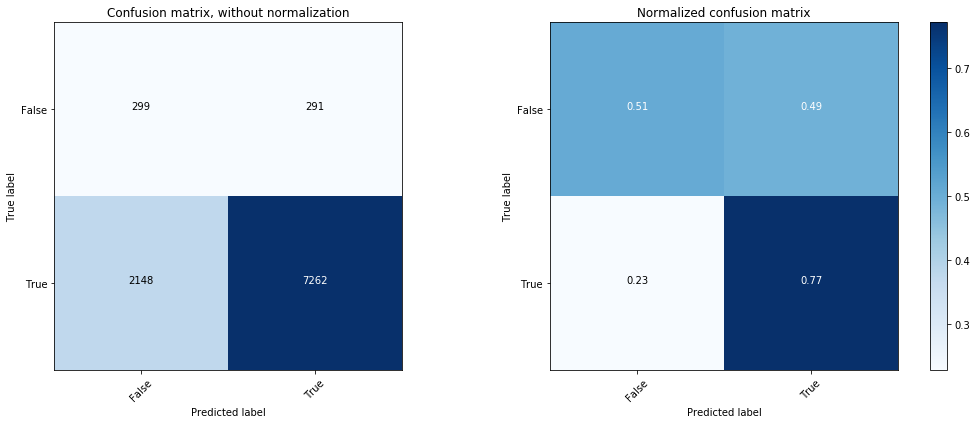

RandomForestClassifier
	AUC = 0.768
	Spécificité = 0.322
	Precision = 0.959
	Recall = 0.991
	Done in 68s
Confusion matrix, without normalization
[[ 190  400]
 [  82 9328]]
Normalized confusion matrix
[[0.32 0.68]
 [0.01 0.99]]


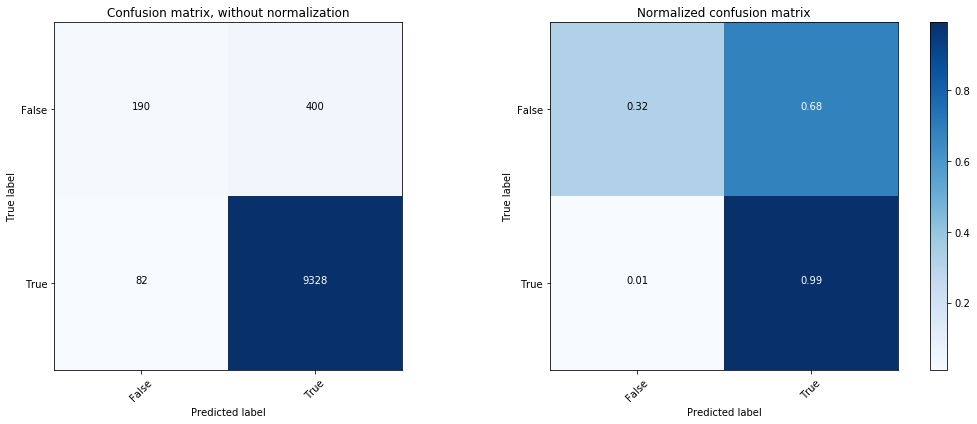

Indiscore actuel
	AUC = 0.639


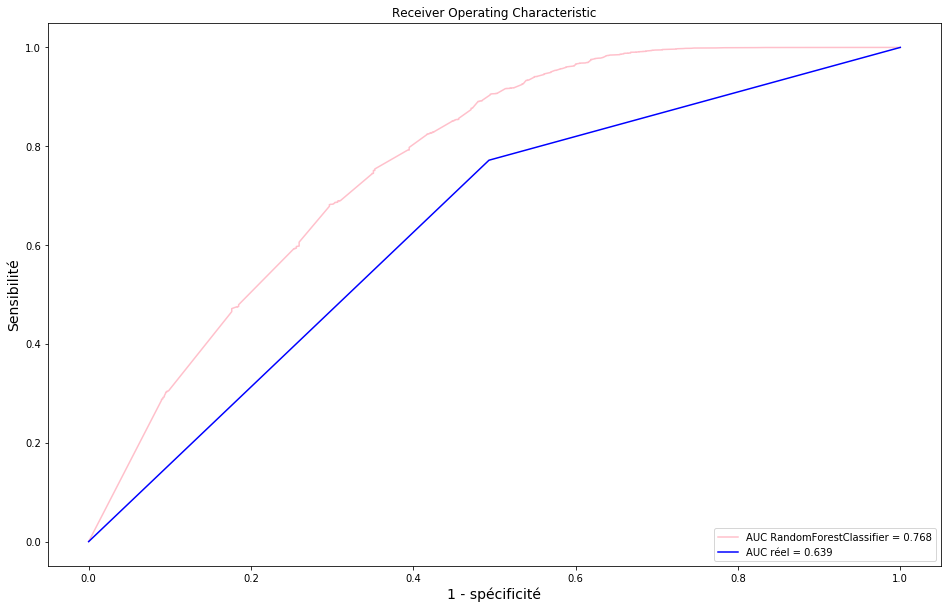

In [28]:
# Compute confusion matrix - JEU DE TEST
print('\t\tAnalyse du jeu de test')
cnf_matrix = confusion_matrix(y_test, y_pred_actuelle)
# Plot normalized & non-normalized confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# Réduction
if CT_REDUC:
    reducPCA, X_red = testPCA(pd.merge(x_test, x_train))
    x_train = reducPCA.transform(x_train)
    x_test = reducPCA.transform(x_test)

fpr = []
tpr = []
labels = []
rocs = []

# Méthode naive par la classe la plus fréquente pour comparer
#RunModel(dummy.DummyClassifier(strategy='most_frequent'), 'Méthode naive')
#RunModel(GaussianNB(), 'GaussianNB') Pas performant
#lrModel = RunModel(LogisticRegression(), 'LogisticRegression')
#etModel = RunModel(ExtraTreesClassifier(), 'ExtraTreesClassifier')
#RunModel(KNeighborsClassifier(), 'KNeighborsClassifier') Trop long
#gbModel = RunModel(GradientBoostingClassifier(), 'GradientBoostingClassifier')
bestModel = RunModel(RandomForestClassifier(n_estimators=100), 'RandomForestClassifier')

addReel(y_test, y_pred_actuelle)
displayROC()

ii_AGE              0.104370
procolMoins1_       0.059641
procolMoins1_R      0.050036
jg_NBDF             0.037817
ii_CAPITAL          0.032912
ii_EFF_ENT          0.024746
procolMoins2_       0.021164
procolMoins3_       0.020413
procolMoins1_P      0.019736
procolMoins2_R      0.017012
ii_ACTIVNAT_0       0.016496
ii_CJ_5499          0.016147
ii_CJ_5498          0.014608
jl_PARTICIPATION    0.012214
ii_NAF1_G           0.011842
dtype: float64


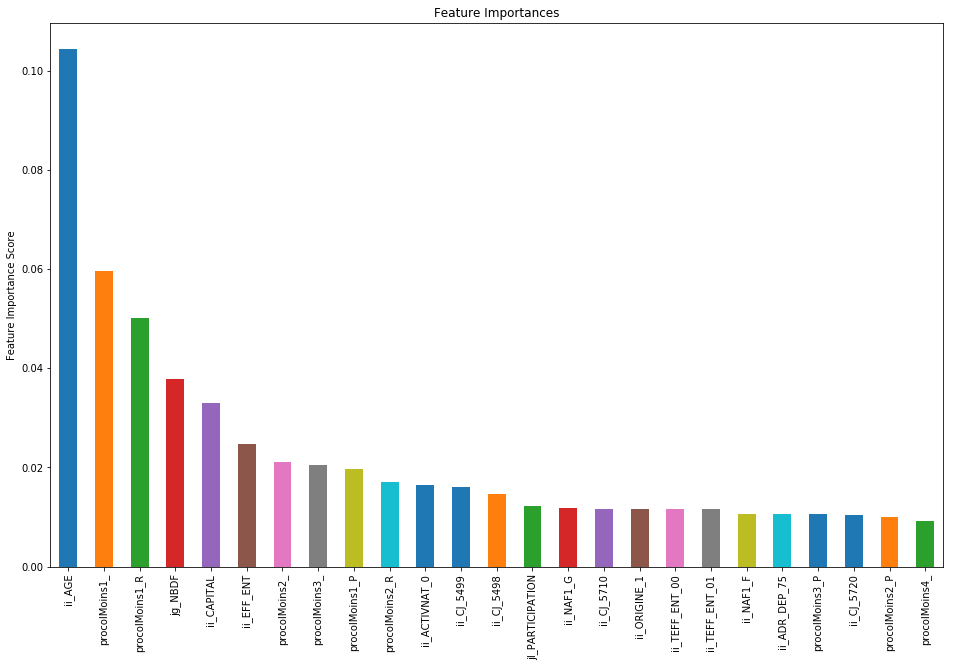

In [29]:
# Pas compatible avec la réduction de dimension
if not CT_REDUC:
    predictors = [x for x in x_train.columns]
    feat_imp = pd.Series(bestModel.feature_importances_, predictors).sort_values(ascending=False)
    print(feat_imp[:15])
    plt.figure(figsize=(16, 10))
    feat_imp[:25].plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

LogisticRegression
	AUC = 0.785
	Spécificité = 0.290
	Precision = 0.957
	Recall = 0.997
	Done in 8s
Confusion matrix, without normalization
[[ 171  419]
 [  27 9383]]
Normalized confusion matrix
[[0.29 0.71]
 [0.   1.  ]]


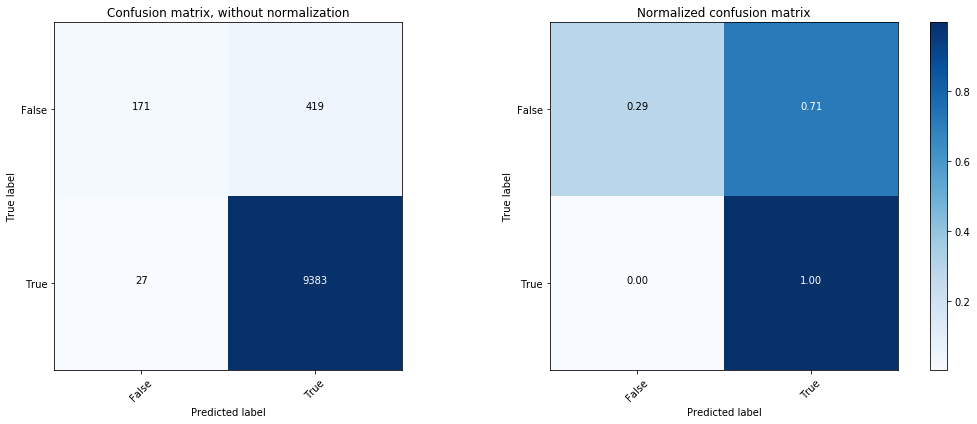

ExtraTreesClassifier
	AUC = 0.704
	Spécificité = 0.337
	Precision = 0.959
	Recall = 0.980
	Done in 13s
Confusion matrix, without normalization
[[ 199  391]
 [ 191 9219]]
Normalized confusion matrix
[[0.34 0.66]
 [0.02 0.98]]


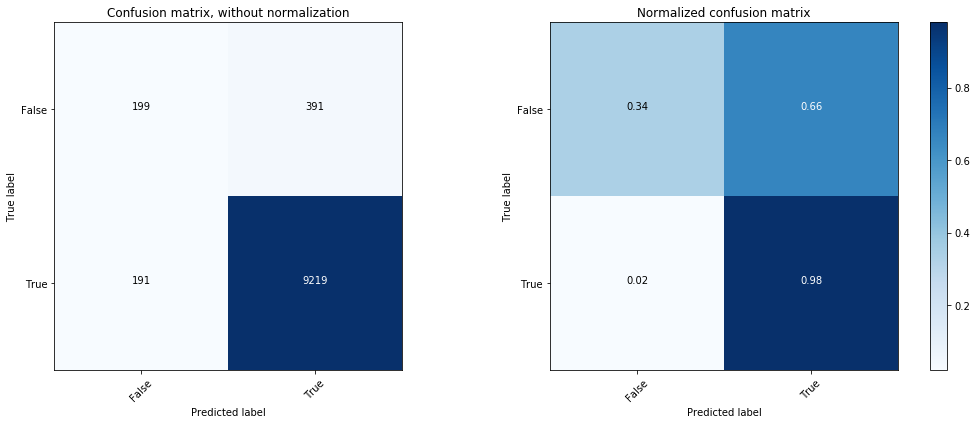

In [30]:
lrModel = RunModel(LogisticRegression(), 'LogisticRegression')
etModel = RunModel(ExtraTreesClassifier(), 'ExtraTreesClassifier')

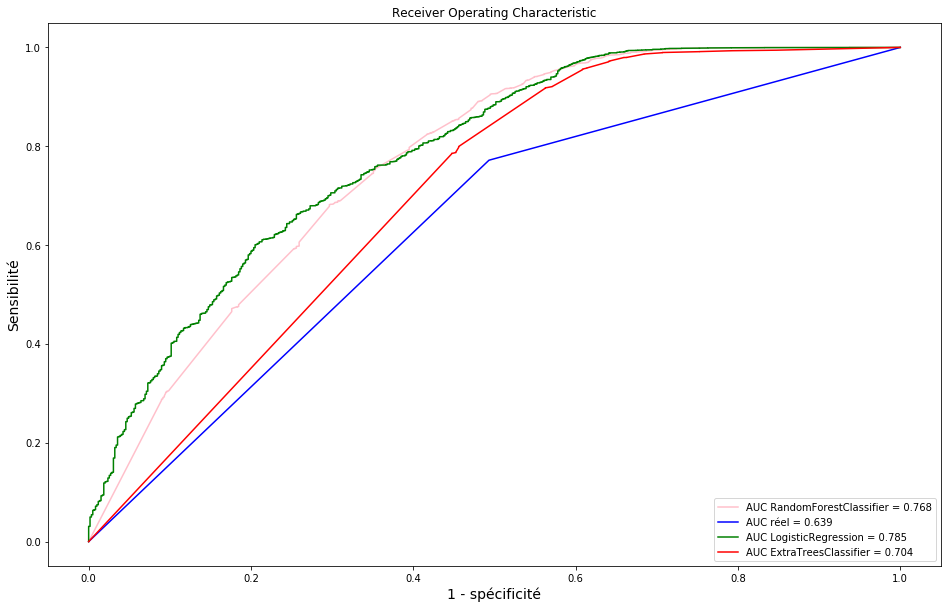

In [31]:
displayROC()

In [68]:
lrModel.predict_proba(x_train[:1])

array([[0.01, 0.99]])

In [69]:
X_red.shape

NameError: name 'X_red' is not defined

In [ ]:
dfraw['msoScore'] = lrModel.predict(x_final)